### 텍스트 전처리는 아래의 세부 과정으로 구성되어 있다.

### (1) 텍스트 호출
### (2) 토큰화하기 (ex: stemming, morph analyzing)
### (3) 토큰 태깅 (ex: POS, NER)
### (4) 토큰 추출/ 랭크(ex: stopword removal, TF-IDF)

## 설치할 라이브러리
### 1. pip install nltk
### 2. pip install wordcloud

## (1) 텍스트 호출

In [1]:
import nltk
#nltk.download('gutenberg')
#nltk.download('punkt')
#nltk.download('stopword')
#nltk.download('maxent_treebank_pos_tagger')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Chankoo\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chankoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Chankoo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chankoo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [1]:
import nltk
from nltk.corpus import gutenberg   # nltk를 통해 분석할 파일을 불러오자 gutenberg데이터 셋에는 많은 텍스트파일들이 있음
doc_en = gutenberg.open('shakespeare-hamlet.txt').read() #햄릿호출
print(doc_en).head()
#files=open('xxx.txt', 'r')  #따로 자기가 분석하고 싶은 파일을 쓰고싶다면 이런식으로 호출하면 끝

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

AttributeError: 'NoneType' object has no attribute 'head'

# (2) 토큰화(Tokenize)하기

In [7]:
from nltk import word_tokenize
tokens_word = word_tokenize(doc_en)
print(tokens_word) #텍스트 토큰화

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.', 'Barnardo', '.', 'Who', "'s", 'there', '?', 'Fran', '.', 'Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe', 'Bar', '.', 'Long', 'liue', 'the', 'King', 'Fran', '.', 'Barnardo', '?', 'Bar', '.', 'He', 'Fran', '.', 'You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'Bar', '.', "'T", 'is', 'now', 'strook', 'twelue', ',', 'get', 'thee', 'to', 'bed', 'Francisco', 'Fran', '.', 'For', 'this', 'releefe', 'much', 'thankes', ':', "'T", 'is', 'bitter', 'cold', ',', 'And', 'I', 'am', 'sicke', 'at', 'heart', 'Barn', '.', 'Haue', 'you', 'had', 'quiet', 'Guard', '?', 'Fran', '.', 'Not', 'a', 'Mouse', 'stirring', 'Barn', '.', 'Well', ',', 'goodnight', '.', 'If', 'you', 'do', 'meet', 'Horatio', 'and', 'Marcellus', ',', 'the', 'Riuals', 'of', 'my', 'Watch', ',', 'bid', 'them', 'ma

In [8]:
from nltk import sent_tokenize
tokens_sentence = sent_tokenize(doc_en)
print(tokens_sentence)

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.', 'He\n\n   Fran.', 'You come most carefully vpon your houre\n\n   Bar.', "'Tis now strook twelue, get thee to bed Francisco\n\n   Fran.", "For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn.", 'Haue you had quiet Guard?', 'Fran.', 'Not a Mouse stirring\n\n   Barn.', 'Well, goodnight.', 'If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.', 'Enter Horatio and Marcellus.', 'Fran.', 'I thinke I heare them.', "Stand: who's there?", 'Hor.', 'Friends to this ground\n\n   Mar.', 'And Leige-men to the Dane\n\n   Fran.', 'Giue you good night\n\n   Mar.', "O farwel honest Soldier, who hath relieu'd you?", 'Fra.', "Barnardo ha's my place: giue you go

In [5]:
#from nltk import regexp_tokenize
#pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
#tokens_en = regexp_tokenize(doc_en, pattern)    #특정 패턴만 추출하고 싶다면 위와 같이 정규식을 이용할 수 있음.

## (3) 토큰(Token) 태깅 (ex. POS tagging)

In [12]:
tags_word = nltk.pos_tag(tokens_word)
print(tags_word) #각 단어별 품사가 태깅됨.

[('[', 'IN'), ('The', 'DT'), ('Tragedie', 'NNP'), ('of', 'IN'), ('Hamlet', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('Shakespeare', 'NNP'), ('1599', 'CD'), (']', 'NNP'), ('Actus', 'NNP'), ('Primus', 'NNP'), ('.', '.'), ('Scoena', 'NNP'), ('Prima', 'NNP'), ('.', '.'), ('Enter', 'NNP'), ('Barnardo', 'NNP'), ('and', 'CC'), ('Francisco', 'NNP'), ('two', 'CD'), ('Centinels', 'NNP'), ('.', '.'), ('Barnardo', 'NNP'), ('.', '.'), ('Who', 'WP'), ("'s", 'VBZ'), ('there', 'RB'), ('?', '.'), ('Fran', 'NNP'), ('.', '.'), ('Nay', 'NNP'), ('answer', 'IN'), ('me', 'PRP'), (':', ':'), ('Stand', 'NNP'), ('&', 'CC'), ('vnfold', 'VB'), ('your', 'PRP$'), ('selfe', 'JJ'), ('Bar', 'NNP'), ('.', '.'), ('Long', 'NNP'), ('liue', 'VBD'), ('the', 'DT'), ('King', 'NNP'), ('Fran', 'NNP'), ('.', '.'), ('Barnardo', 'NNP'), ('?', '.'), ('Bar', 'NNP'), ('.', '.'), ('He', 'PRP'), ('Fran', 'NNP'), ('.', '.'), ('You', 'PRP'), ('come', 'VBP'), ('most', 'RBS'), ('carefully', 'RB'), ('vpon', 'VB'), ('your', 'PRP$'), ('houre

In [13]:
hamlet= nltk.Text(tokens_word)    #Text 함수는 문서 탐색을 용이하게한다
print("문서의 길이 : ", len(hamlet.tokens))       # 문서의 길이 반환
print("단어의 set : ", len(set(hamlet.tokens)))  # 단어의 set 반환(유니크 단어 수)
print("단어의 빈도수 출력")
hamlet.vocab()                  # 각 단어별 빈도수 반환

문서의 길이 :  36326
단어의 set :  5540
단어의 빈도수 출력


FreqDist({'[': 6,
          'The': 133,
          'Tragedie': 3,
          'of': 576,
          'Hamlet': 99,
          'by': 90,
          'William': 1,
          'Shakespeare': 1,
          '1599': 1,
          ']': 6,
          'Actus': 2,
          'Primus': 1,
          '.': 1879,
          'Scoena': 1,
          'Prima': 1,
          'Enter': 82,
          'Barnardo': 8,
          'and': 605,
          'Francisco': 2,
          'two': 20,
          'Centinels': 1,
          'Who': 24,
          "'s": 119,
          'there': 66,
          '?': 459,
          'Fran': 8,
          'Nay': 25,
          'answer': 8,
          'me': 227,
          ':': 566,
          'Stand': 4,
          '&': 25,
          'vnfold': 3,
          'your': 233,
          'selfe': 65,
          'Bar': 7,
          'Long': 2,
          'liue': 14,
          'the': 860,
          'King': 172,
          'He': 42,
          'You': 48,
          'come': 70,
          'most': 65,
          'carefully': 1,
     

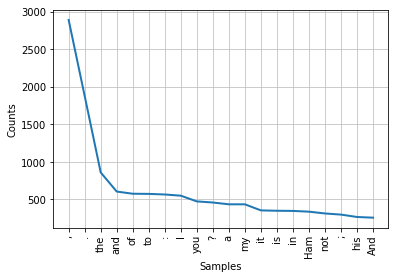

In [14]:
%matplotlib inline
hamlet.plot(20)   #hamlet 자주 나타난 상위 20단어
                  #언어의 특성상 ',' 'the'이런 단어들이 많음. 제거할 필요가 있음.

## (4) 토큰(Token) 추출, 랭크 (ex. Stopwords 제거)

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words 출력
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# 원하는 Stopword 추가
newStopWords = ['!','&','?',',',"'",':',' ', '.', ';']
stop_words.extend(newStopWords)
token2 = [h for h in hamlet if not h in stop_words]
print(token2)

['[', 'The', 'Tragedie', 'Hamlet', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'Francisco', 'two', 'Centinels', 'Barnardo', 'Who', "'s", 'Fran', 'Nay', 'answer', 'Stand', 'vnfold', 'selfe', 'Bar', 'Long', 'liue', 'King', 'Fran', 'Barnardo', 'Bar', 'He', 'Fran', 'You', 'come', 'carefully', 'vpon', 'houre', 'Bar', "'T", 'strook', 'twelue', 'get', 'thee', 'bed', 'Francisco', 'Fran', 'For', 'releefe', 'much', 'thankes', "'T", 'bitter', 'cold', 'And', 'I', 'sicke', 'heart', 'Barn', 'Haue', 'quiet', 'Guard', 'Fran', 'Not', 'Mouse', 'stirring', 'Barn', 'Well', 'goodnight', 'If', 'meet', 'Horatio', 'Marcellus', 'Riuals', 'Watch', 'bid', 'make', 'hast', 'Enter', 'Horatio', 'Marcellus', 'Fran', 'I', 'thinke', 'I', 'heare', 'Stand', "'s", 'Hor', 'Friends', 'ground', 'Mar', 'And', 'Leige-men', 'Dane', 'Fran', 'Giue', 'good', 'night', 'Mar', 'O', 'farwel', 'honest', 'Soldier', 'hath', 'relieu', "'d", 'Fra', 'Barnardo', 'ha', "'s", 'place', 'giue

In [19]:
print("Stopword 제거 전")
print("문서의 길이 : ", len(hamlet.tokens))       # 문서의 길이 반환
print("단어의 set 수 : ", len(set(hamlet.tokens)))  # 단어의 set 반환(유니크 단어 수)

print("\nStopword 제거 후")
hamlet2= nltk.Text(token2)
print("문서의 길이 : ", len(hamlet2.tokens))       # 문서의 길이 반환
print("단어의 set 수 : ",len(set(hamlet2.tokens)))  # 단어의 set 반환(유니크 단어 수)
print("단어의 빈도수 출력")
hamlet2.vocab()  

Stopword 제거 전
문서의 길이 :  36326
단어의 set 수 :  5540

Stopword 제거 후
문서의 길이 :  19097
단어의 set 수 :  5427
단어의 빈도수 출력


FreqDist({'[': 6,
          'The': 133,
          'Tragedie': 3,
          'Hamlet': 99,
          'William': 1,
          'Shakespeare': 1,
          '1599': 1,
          ']': 6,
          'Actus': 2,
          'Primus': 1,
          'Scoena': 1,
          'Prima': 1,
          'Enter': 82,
          'Barnardo': 8,
          'Francisco': 2,
          'two': 20,
          'Centinels': 1,
          'Who': 24,
          "'s": 119,
          'Fran': 8,
          'Nay': 25,
          'answer': 8,
          'Stand': 4,
          'vnfold': 3,
          'selfe': 65,
          'Bar': 7,
          'Long': 2,
          'liue': 14,
          'King': 172,
          'He': 42,
          'You': 48,
          'come': 70,
          'carefully': 1,
          'vpon': 37,
          'houre': 5,
          "'T": 20,
          'strook': 1,
          'twelue': 5,
          'get': 5,
          'thee': 58,
          'bed': 9,
          'For': 76,
          'releefe': 1,
          'much': 42,
          'thankes':

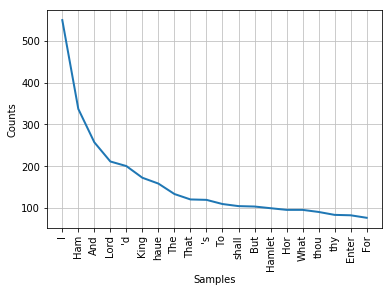

In [20]:
hamlet2.plot(20)   #hamlet2 자주 나타난 상위 20단어

In [21]:
data = hamlet2.vocab().items()
print(data) #각 단어별 빈도수를 묶어서 데이터 셋으로 저장

dict_items([('[', 6), ('The', 133), ('Tragedie', 3), ('Hamlet', 99), ('William', 1), ('Shakespeare', 1), ('1599', 1), (']', 6), ('Actus', 2), ('Primus', 1), ('Scoena', 1), ('Prima', 1), ('Enter', 82), ('Barnardo', 8), ('Francisco', 2), ('two', 20), ('Centinels', 1), ('Who', 24), ("'s", 119), ('Fran', 8), ('Nay', 25), ('answer', 8), ('Stand', 4), ('vnfold', 3), ('selfe', 65), ('Bar', 7), ('Long', 2), ('liue', 14), ('King', 172), ('He', 42), ('You', 48), ('come', 70), ('carefully', 1), ('vpon', 37), ('houre', 5), ("'T", 20), ('strook', 1), ('twelue', 5), ('get', 5), ('thee', 58), ('bed', 9), ('For', 76), ('releefe', 1), ('much', 42), ('thankes', 4), ('bitter', 3), ('cold', 6), ('And', 257), ('I', 550), ('sicke', 3), ('heart', 24), ('Barn', 10), ('Haue', 17), ('quiet', 5), ('Guard', 2), ('Not', 14), ('Mouse', 2), ('stirring', 1), ('Well', 11), ('goodnight', 5), ('If', 47), ('meet', 3), ('Horatio', 40), ('Marcellus', 10), ('Riuals', 1), ('Watch', 8), ('bid', 5), ('make', 45), ('hast', 26),

In [22]:
hamlet2.count('father')   #hamlet에서 father라는 단어가 나온 빈도수

4

In [23]:
hamlet2.similar('Hamlet') #Hamlet과 의미가 유사하게 사용된 단어

lord enter king i quiet horatio hast o speake made ghost comes see
tell why oh bird exeunt queene wife


## (5) 결과 시각화

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wcloud = WordCloud(max_font_size=30).generate(doc_en)
wcloud.words_  # 단어별 빈도수를 확률로 보여줌 

{'Arme': 0.056910569105691054,
 'Ayre': 0.052845528455284556,
 'Brother': 0.06504065040650407,
 'Clo': 0.11788617886178862,
 'Denmarke': 0.08536585365853659,
 'England': 0.08536585365853659,
 'Enter': 0.17479674796747968,
 'Enter King': 0.06097560975609756,
 'Exit': 0.07723577235772358,
 'Farewell': 0.06097560975609756,
 'Father': 0.23577235772357724,
 'Fortune': 0.06504065040650407,
 'Friend': 0.09349593495934959,
 'Ghost': 0.08943089430894309,
 'God': 0.13008130081300814,
 'Guild': 0.08130081300813008,
 'Ham': 1.0,
 'Hamlet': 0.32113821138211385,
 'Hamlet Ham': 0.06097560975609756,
 'Heauen': 0.1991869918699187,
 'Hor': 0.3861788617886179,
 'Horatio': 0.14227642276422764,
 'Ile': 0.23577235772357724,
 'Kin': 0.06097560975609756,
 'King': 0.6341463414634146,
 'Laer': 0.24390243902439024,
 'Laertes': 0.14227642276422764,
 'Lord': 0.47560975609756095,
 'Lord Ham': 0.2764227642276423,
 'Mar': 0.11788617886178862,
 'Mother': 0.18699186991869918,
 'Nature': 0.10569105691056911,
 'Nay': 0.0

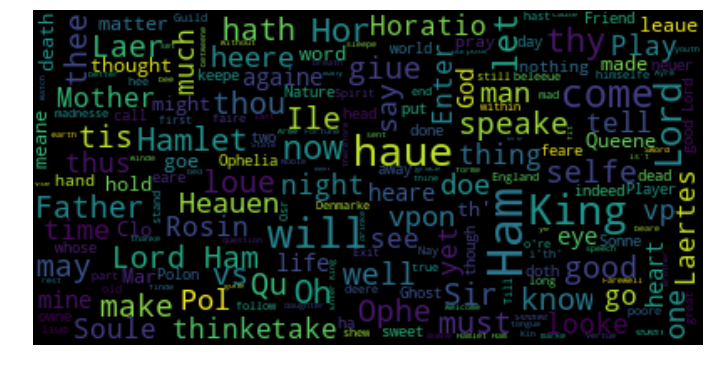

In [27]:
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
import numpy as np
from PIL import Image
hamlet_mask=np.array(Image.open("hamlet_mask.jpg"))
hamlet_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

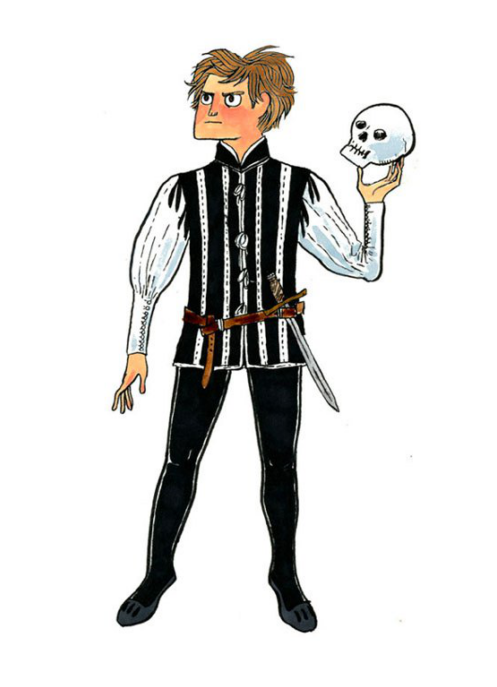

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(hamlet_mask, interpolation="bilinear")
plt.axis("off")
plt.show()

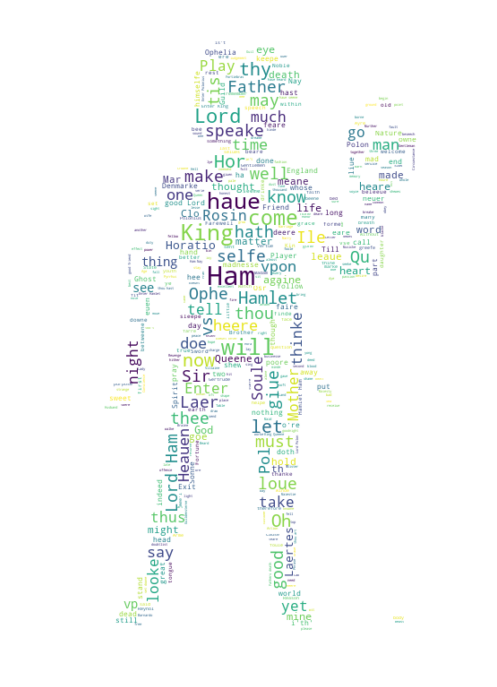

In [20]:
wcloud2 = WordCloud(background_color="white",max_words=1000, mask=hamlet_mask, max_font_size=30).generate(doc_en)
plt.figure(figsize=(12,12))
plt.imshow(wcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()
